In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

train_data.describe()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


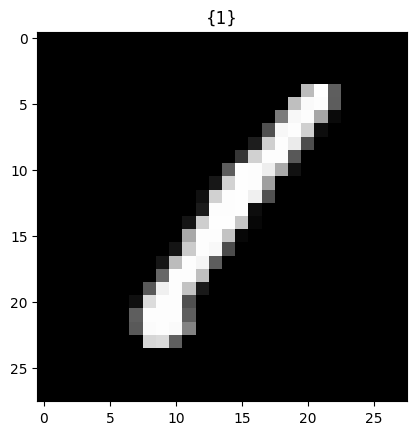

In [2]:
first_image = train_data.iloc[0, 1:].values.reshape(28, 28)
plt.imshow(first_image, cmap='gray')
plt.title({train_data.iloc[0, 0]})
plt.show()


In [3]:
X_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data['label'].values

X_test = test_data.values / 255.0

In [4]:
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [5]:
from tensorflow.keras.utils import to_categorical

y_train_cnn = to_categorical(y_train, num_classes=10)


In [6]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    MaxPooling2D(pool_size=(2, 2)), 

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),

    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.8758 - loss: 0.3995 - val_accuracy: 0.9825 - val_loss: 0.0586
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9826 - loss: 0.0587 - val_accuracy: 0.9844 - val_loss: 0.0550
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9890 - loss: 0.0362 - val_accuracy: 0.9800 - val_loss: 0.0667
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9909 - loss: 0.0285 - val_accuracy: 0.9888 - val_loss: 0.0388
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9954 - loss: 0.0163 - val_accuracy: 0.9874 - val_loss: 0.0453
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9857 - val_loss: 0.0534
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9876 - val_loss: 0.0445
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9971 -

In [9]:
val_loss, val_acc = model.evaluate(X_train_cnn, y_train)
val_acc

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9969 - loss: 0.0089


0.9951666593551636

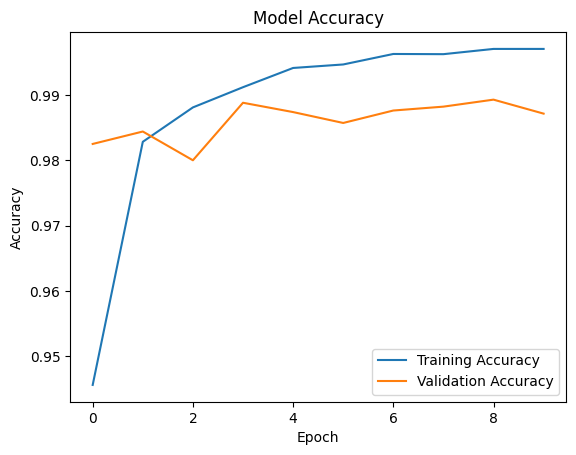

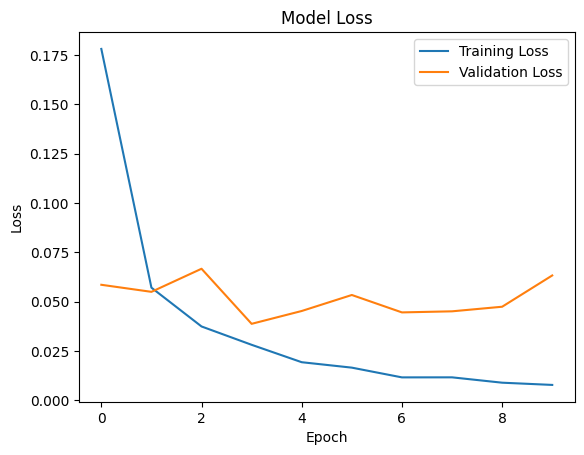

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
test_predictions = model.predict(X_test_cnn)
test_labels = test_predictions.argmax(axis=1)

submission = pd.DataFrame({'ImageId': list(range(1, len(test_labels)+1)), 'Label': test_labels})
submission.to_csv('/kaggle/working/submission.csv', index=False)
model.save('/kaggle/working/model.h5')